Dane do zadania pochodzą ze strony: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Celem zadania jest przewidzenie wartości median_house_value.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\natal\AppData\Local\Temp\ipykernel_6496\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Przygotowanie danych

Wczytujemy dane z pliku CSV.

In [4]:
data = pd.read_csv("housing.csv")

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Wypisujemy podstawowe informacje o wszystkich danych w pobranym DataFrame.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Usuwamy brakujące wartości.

In [7]:
data.dropna(inplace=True)

Następnie ponownie sprawdzamy ilość danych w poszczególnych kolumnach.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Przy przygotowaniu danych potrzebujemy podzielić DataFrame na wartości x, czyli features i y, czyli target będący 'median_house_value'.

In [9]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

Wypisujemy wszystkie dane wejściowe

In [10]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


i wartości które chcemy oszacować.

In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

Dzielimy zbriór danych na dane treningowe 80% y dane testowe 20%.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Analiza danych i zależności

Łączymy dane x_train oraz y_train w celu umożliwienia zbadania przykładowej korelacji.

In [13]:
train_data = x_train.join(y_train)

Graficznie przedstawiamy dystrybucje poszczególnych cech.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

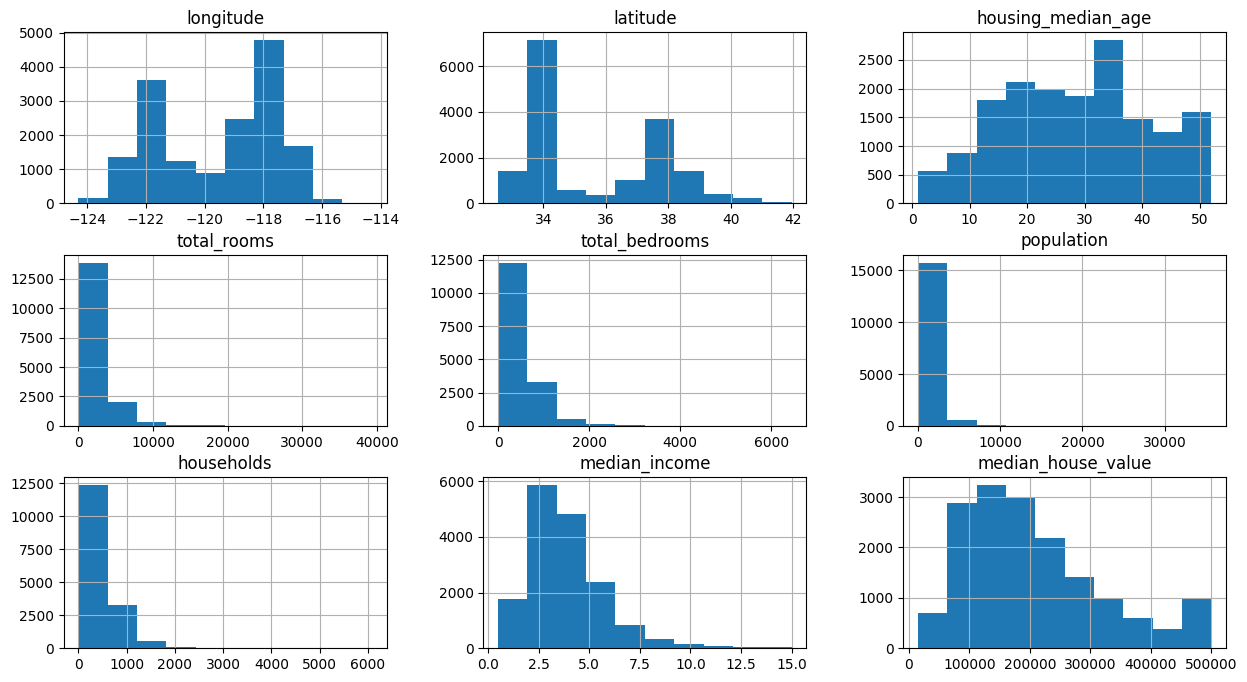

In [14]:
train_data.hist(figsize=(15, 8))

Powyższe dystrybucje odbiegają od dystrybucji normalnych. W przypadku total_rooms, total_beldrooms, population i households przeważają wartości w dolnym zakresie wartości. Natomiast w przypadku szerokości i długości geograficznej mamy dwa zgrupowania wartości przy południku -122 i -118 oraz równoleżnikach 34 i 38.

Możemy również zwizualizować korelacje pomiędzy poszczególnymi cechami domów w postaci heatmap.

<Axes: >

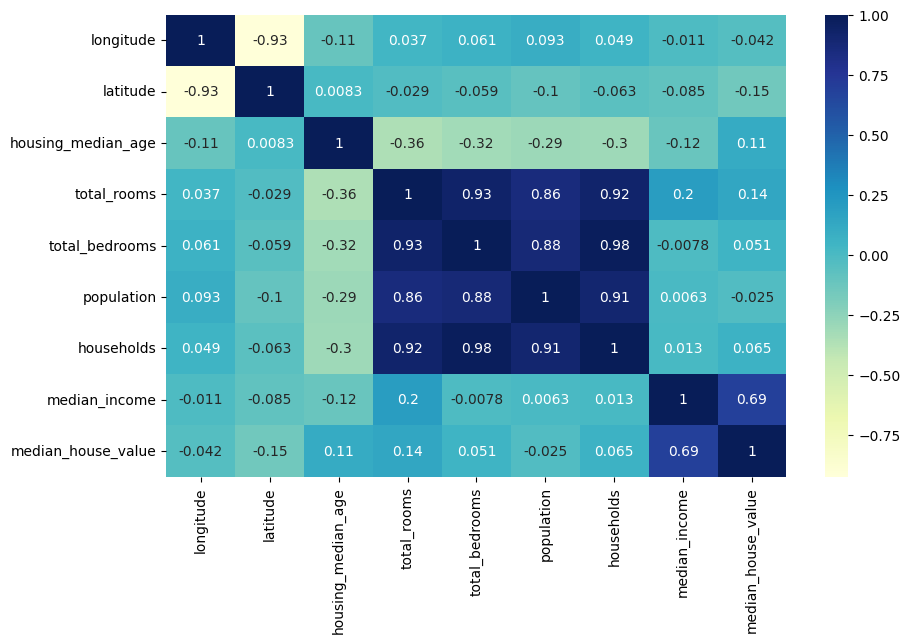

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.drop(columns=['ocean_proximity']).corr(), annot=True, cmap='YlGnBu')

Największa korelacja występuje pomiędzy wartościami total_rooms, total_bedrooms, population i households. Jest to logicznie uzasadnione, gdyż im więcej pokoi oraz sypialni, tym wyższa jest liczba domowników. Istnieje różnież znacząca zależność pomiędzy średnimi zarobkami i średnią wartością domu.

Ponadto możemy zastosować skalę logarytmiczną żeby skupić się na najbardziej licznych wartościach, a nie na wartościach skrajnych.

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

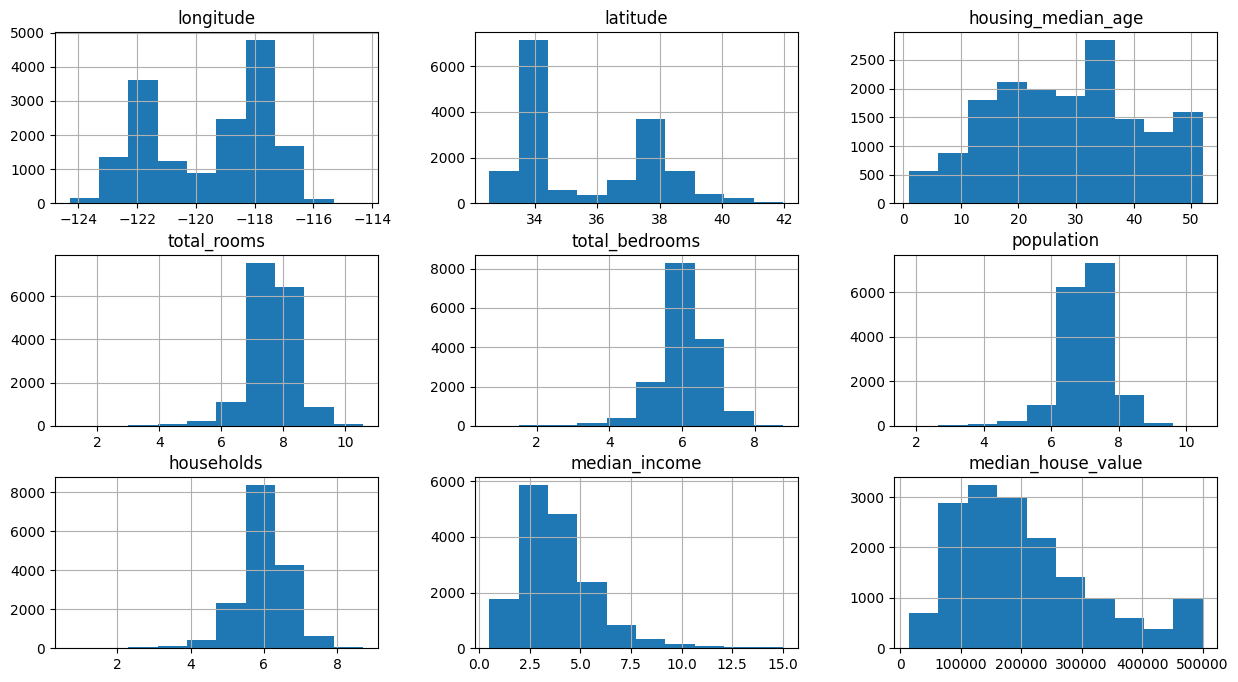

In [17]:
train_data.hist(figsize=(15,8))

Po zastosowaniu logarytmu widzimy wartości z większą precyzją i o lepszej dystrybucji.

Wartości kategoryczne, w tym przypadku bliskość do oceanu, należy przekształcić do osobnych kolumn (każda reprezentuje inną wartość).

In [18]:
ocean_proximity_one_hot = pd.get_dummies(train_data.ocean_proximity).astype(int)
ocean_proximity_one_hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2594,0,0,0,0,1
13425,0,1,0,0,0
13248,0,1,0,0,0
11313,1,0,0,0,0
6169,1,0,0,0,0
...,...,...,...,...,...
10577,1,0,0,0,0
13261,0,1,0,0,0
6230,1,0,0,0,0
16846,0,0,0,0,1


Łączymy nowe kolumny dotyczące ocean_proximity z pozostałymi kolumnami usuwając oryginalne wartości kategoryczne.

In [19]:
train_data = train_data.join(ocean_proximity_one_hot).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2594,-124.06,40.88,12.0,7.643962,6.052089,7.380256,6.084499,2.5667,139500.0,0,0,0,0,1
13425,-117.40,34.18,16.0,7.478735,5.541264,7.483807,5.529429,5.3671,181800.0,0,1,0,0,0
13248,-117.65,34.11,29.0,7.982075,6.453625,7.444833,6.436150,3.6219,176600.0,0,1,0,0,0
11313,-117.95,33.77,38.0,6.897705,5.509388,6.539586,5.323010,3.2632,180900.0,1,0,0,0,0
6169,-117.93,34.09,37.0,7.078342,5.420535,6.646391,5.463832,4.4625,154200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,-117.69,33.63,23.0,7.275865,5.564520,6.675823,5.537334,4.9079,273800.0,1,0,0,0,0
13261,-117.67,34.10,19.0,7.996317,6.406880,7.190676,6.352629,4.3438,155700.0,0,1,0,0,0
6230,-117.94,34.06,34.0,7.561122,6.047372,7.115582,6.104793,3.6648,193900.0,1,0,0,0,0
16846,-122.41,37.62,49.0,7.289611,5.713733,6.456770,5.560682,4.2500,284100.0,0,0,0,0,1


Nowa wizualizacja korelacji pomiędzy poszczególnymi cechami domów w postaci heatmap.

<Axes: >

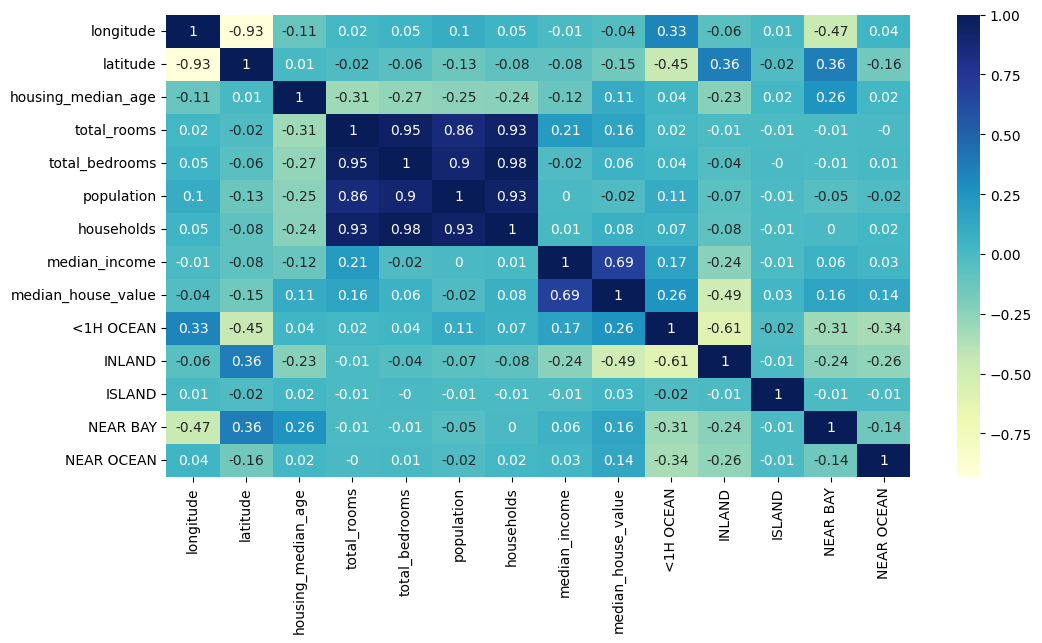

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr().round(2), annot=True, cmap='YlGnBu')

Ciekawą opcją jest pokazanie zmian median_house_value w zależności od położenia geograficznego.

<Axes: xlabel='latitude', ylabel='longitude'>

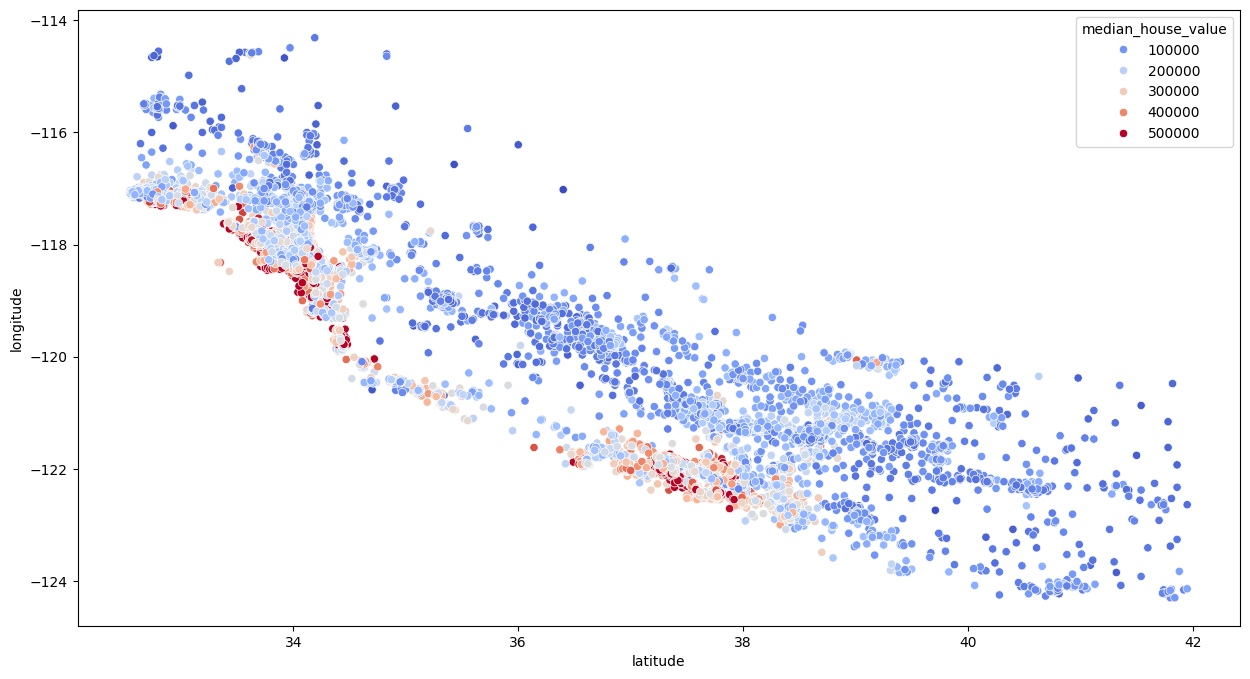

In [22]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

Widzimy największe nagromadzenie drogich nieruchomości w okolicach dwóch największych miast San Francisco i Los Angeles.

Poza danymi pobranymi z oryginalnego zbioru danych możemy również dodać nowe wartości obliczane z istniejących kolumn. Może to pomóc w poprawieniu zdolności modelu.

<Axes: >

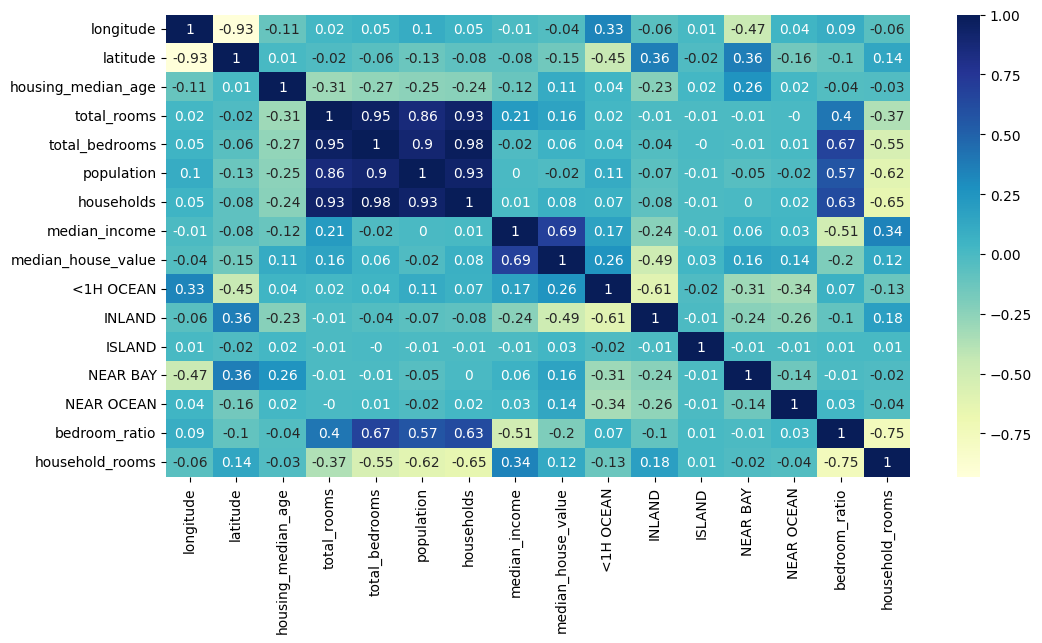

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr().round(2), annot=True, cmap='YlGnBu')

## Definicja modelu

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Przed użyciem przygotowanych danych, konieczne jest przeskalowanie wartości wszyskich kolumn. Zapobiega to najmiernemu użyciu danych o wysokich wartościach w modelu regresji.

In [ ]:
scaler = StandardScaler ()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

### LinearRegression

Jako pierwszy model przedstawię regresję liniową.

In [24]:
reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

Aby móc wykorzystać dane testowe na wytrenowanym modelu musimy przeprowadzić te same transformacje co wcześniej na danych treningowych.

In [25]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [26]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

W danych testowych nie znalazł się żaden dom na wyspie i metoda get_dummies nie stworzyła kolumny o nazwie ISLAND. Musimy ją dodać ręcznie aby uzyskać taką samą liczbę kolumn jak w zbiorze treningowym.

In [27]:
x_test.loc[:,'ISLAND'] = 0
x_test = x_test.loc[:,x_train.columns]
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14325,-117.16,32.72,52.0,6.670766,6.139885,6.692084,5.971262,0.9142,0,0,0,0,1,0.920417,1.117145
5058,-118.35,34.01,33.0,8.085487,6.400257,7.368970,6.403574,3.6629,1,0,0,0,0,0.791574,1.262652
8017,-118.10,33.84,36.0,7.351158,5.602119,6.548219,5.529429,4.5417,1,0,0,0,0,0.762073,1.329461
19616,-121.31,37.44,33.0,4.248495,3.367296,3.871201,2.708050,0.5360,0,1,0,0,0,0.792586,1.568839
4850,-118.30,34.03,47.0,7.715124,6.327937,7.482119,6.224558,2.1571,1,0,0,0,0,0.820199,1.239465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15352,-117.31,33.25,14.0,8.155936,6.639876,7.669028,6.533789,3.1250,1,0,0,0,0,0.814116,1.248271
19224,-122.70,38.45,39.0,7.608871,5.817111,6.463029,5.755742,4.1734,1,0,0,0,0,0.764517,1.321962
19600,-120.95,37.57,29.0,7.073270,5.521461,6.511745,5.497168,3.1125,0,1,0,0,0,0.780609,1.286712
12191,-117.38,33.67,9.0,9.494692,7.911691,8.886824,7.762596,3.3750,1,0,0,0,0,0.833275,1.223134


In [28]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2594,-124.06,40.88,12.0,7.643962,6.052089,7.380256,6.084499,2.5667,0,0,0,0,1,0.791748,1.256301
13425,-117.40,34.18,16.0,7.478735,5.541264,7.483807,5.529429,5.3671,0,1,0,0,0,0.740936,1.352533
13248,-117.65,34.11,29.0,7.982075,6.453625,7.444833,6.436150,3.6219,0,1,0,0,0,0.808515,1.240194
11313,-117.95,33.77,38.0,6.897705,5.509388,6.539586,5.323010,3.2632,1,0,0,0,0,0.798728,1.295828
6169,-117.93,34.09,37.0,7.078342,5.420535,6.646391,5.463832,4.4625,1,0,0,0,0,0.765792,1.295490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,-117.69,33.63,23.0,7.275865,5.564520,6.675823,5.537334,4.9079,1,0,0,0,0,0.764792,1.313965
13261,-117.67,34.10,19.0,7.996317,6.406880,7.190676,6.352629,4.3438,0,1,0,0,0,0.801229,1.258741
6230,-117.94,34.06,34.0,7.561122,6.047372,7.115582,6.104793,3.6648,1,0,0,0,0,0.799798,1.238555
16846,-122.41,37.62,49.0,7.289611,5.713733,6.456770,5.560682,4.2500,0,0,0,0,1,0.783819,1.310920


Przy danych testowych używamy wcześniej wytrenowanego modelu scaler, stosując już wcześniej obliczoną średnią i odchylenie standardowe.

In [29]:
x_test_s = scaler.transform(x_test)

In [30]:
reg.score(x_test_s, y_test)

0.6536584180076827

Uzyskany wynik 0.65 nie jest najlepszy więc możemy w dalszej kolejności spróbować modelu bardziej złożonego.

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
forest.score(x_test, y_test)

0.8104283600718885

Wartość predykcji znacząco poprawiła się z 0.65 do 0.81. Tą wartość można dodatkowo poprawić poprzez wyszukanie optymalnych hiper parametrów przy użyciu, Grid Search z zastosowaniem Cross Validation.

In [55]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': [4, 8, 12, 16]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, verbose=1)
grid_search.fit(x_train_s, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 8, 12, 16],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=1)

Pobieramy najlepszy znaleziony model i sprawdzamy nowy wynik.

In [56]:
best_forest = grid_search.best_estimator_

In [57]:
best_forest

RandomForestRegressor(max_features=12, n_estimators=300)

In [58]:
best_forest.score(x_test_s, y_test)

0.8181107261891608

Uzyskany wynik jest minimalnie lepszy od uzyskanego przy użyciu standardowych parametrów Random Forest Regressor.

Na koniec możemy pobrać przykładowe 5 domów ze zbioru testowego i porównać oszacowane wartości z ceną rzeczywistą.

In [59]:
test_house = x_test.iloc[:5,:]
test_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14325,-117.16,32.72,52.0,6.670766,6.139885,6.692084,5.971262,0.9142,0,0,0,0,1,0.920417,1.117145
5058,-118.35,34.01,33.0,8.085487,6.400257,7.368970,6.403574,3.6629,1,0,0,0,0,0.791574,1.262652
8017,-118.10,33.84,36.0,7.351158,5.602119,6.548219,5.529429,4.5417,1,0,0,0,0,0.762073,1.329461
19616,-121.31,37.44,33.0,4.248495,3.367296,3.871201,2.708050,0.5360,0,1,0,0,0,0.792586,1.568839
4850,-118.30,34.03,47.0,7.715124,6.327937,7.482119,6.224558,2.1571,1,0,0,0,0,0.820199,1.239465


In [60]:
best_forest.predict(test_house)

c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([421315.43666667, 430359.61666667, 427956.26      , 238568.66666667,
       450635.62666667])

In [61]:
y_test.iloc[:5]

14325    162500.0
5058     353200.0
8017     219600.0
19616    112500.0
4850     147900.0
Name: median_house_value, dtype: float64

Dla wybranych pięciu domów oszacowane wartości okazały sie jednak dalekie od rzeczywistych.